In [1]:
import os
import sys
import urllib.request
import json

In [2]:
import numpy as np
import pandas as pd
import copy

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="/System/Library/Fonts/Supplemental/AppleMyungjo.ttf").get_name()
rc('font', family=font_name)

In [4]:
dd = pd.read_csv('./datas.csv', encoding = "utf-8-sig")

In [5]:
dd = dd[dd["values"].isna() == False]

In [6]:
dd = dd.reset_index()
dd["index"] = dd["index"].astype(int)

In [7]:
search_word = pd.DataFrame(dd,columns=["index", "brand_ad", "values"])
search_word

,index,brand_ad,values
0,0,ASTON MARTIN_기흥인터내셔널,"애스턴마틴,ASTON MARTIN"
1,1,ASTON MARTIN_기흥애스턴마틴밴티지,"애스턴마틴,ASTON MARTIN"
2,2,ASTON MARTIN_기흥인터내셔널애스턴마틴,"애스턴마틴,ASTON MARTIN"
3,3,Nissan_닛산엑스트레일,"닛산엑스트레일,닛산X-TRAIL,엑스트레일"
4,4,Nissan_닛산알티마,"닛산알티마2.0,알티마2.0,NissanAltima2.0,Nissan알티마2.0"
...,...,...,...
167,172,Peugeot_한불모터스푸조SUV,"푸조508, 508, 508GT, 푸조508알뤼르, 푸조508ALLURE, PUGE..."
168,173,Honda_혼다CR-V,"혼다 CRV,CRV,2021혼다"
169,174,Honda_혼다CR-V&파일럿,"혼다 CRV,CRV,2021혼다"
170,175,Honda_혼다ACCORD,"혼다어코드,혼다,어코드,혼다어코드1.5T"


In [8]:
search_dict = []
list_key = []
list_value = []

for index in range(len(search_word)) : 
    value_name = list(search_word["brand_ad"])[index] #search_word의 Keys 칼럼을 리스트화 한 후, 순서대로 가져옴
    value_words = (list(search_word["values"])[index]).split(",") #search_word의 values 칼럼을 리스트화 한 후, 순서대로 가져옴
    #dict_value를 split(",")하는 이유는, 개별 키워드가 띄어쓰기로 구분된 리스트 형태여야 하기 때문 
    #ex. "유산균, 프로바이오틱스"(X), "유산균", "프로바이오틱스" (O)
    search_dict.append({"groupName" : value_name, "keywords" : value_words}) 
    #search_dict 리스트에 딕셔너리 타입으로 추가시킴 
    list_key.append(value_name)
    list_value.append(value_words)

In [9]:
search_dict

[{'groupName': 'ASTON MARTIN_기흥인터내셔널', 'keywords': ['애스턴마틴', 'ASTON MARTIN']},
 {'groupName': 'ASTON MARTIN_기흥애스턴마틴밴티지',
  'keywords': ['애스턴마틴', 'ASTON MARTIN']},
 {'groupName': 'ASTON MARTIN_기흥인터내셔널애스턴마틴',
  'keywords': ['애스턴마틴', 'ASTON MARTIN']},
 {'groupName': 'Nissan_닛산엑스트레일',
  'keywords': ['닛산엑스트레일', '닛산X-TRAIL', '엑스트레일']},
 {'groupName': 'Nissan_닛산알티마',
  'keywords': ['닛산알티마2.0', '알티마2.0', 'NissanAltima2.0', 'Nissan알티마2.0']},
 {'groupName': 'Nissan_닛산인피니티Q30', 'keywords': ['인피니티Q30', 'Q30']},
 {'groupName': 'Nissan_닛산인피니티Q50',
  'keywords': ['인피니티Q50', '인피니티QX50', 'QX50']},
 {'groupName': 'Nissan_닛산인피니티QX50',
  'keywords': ['QX50', '인피니티QX50', '큐엑스오공', 'QX오공']},
 {'groupName': 'Mercedes-Benz_더클래스효성',
  'keywords': ['Mercedes-Benz', '메르세데스벤츠', '벤츠', 'Benz']},
 {'groupName': 'Mercedes-Benz_더클래스효성벤츠E클래스',
  'keywords': ['벤츠E클래스', '벤츠E클래스가격', '벤츠E300', '벤츠E250', '벤츠220D']},
 {'groupName': 'Mercedes-Benz_더클래스효성벤츠GLE쿠페',
  'keywords': ['벤츠GLE쿠페', '벤츠GLE', '벤츠GLE300D', '벤츠GLE450', '벤츠G

In [10]:
standard = copy.deepcopy(search_dict[0])
standard

{'groupName': 'ASTON MARTIN_기흥인터내셔널', 'keywords': ['애스턴마틴', 'ASTON MARTIN']}

In [11]:
import urllib.request

def get_trend(body):
    url = "https://openapi.naver.com/v1/datalab/search"
    client_id = "_Dan99FJTyuxjCXwBBs0"
    client_secret = "lmu7d3Mkcb"
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))

    return json.loads(response.read().decode('utf-8'))


In [12]:
crop_dict = search_dict[1:]
split_list = [crop_dict[i:i+4] for i in range(0, len(crop_dict), 4)]

In [13]:
split_list

[[{'groupName': 'ASTON MARTIN_기흥애스턴마틴밴티지',
   'keywords': ['애스턴마틴', 'ASTON MARTIN']},
  {'groupName': 'ASTON MARTIN_기흥인터내셔널애스턴마틴',
   'keywords': ['애스턴마틴', 'ASTON MARTIN']},
  {'groupName': 'Nissan_닛산엑스트레일',
   'keywords': ['닛산엑스트레일', '닛산X-TRAIL', '엑스트레일']},
  {'groupName': 'Nissan_닛산알티마',
   'keywords': ['닛산알티마2.0', '알티마2.0', 'NissanAltima2.0', 'Nissan알티마2.0']}],
 [{'groupName': 'Nissan_닛산인피니티Q30', 'keywords': ['인피니티Q30', 'Q30']},
  {'groupName': 'Nissan_닛산인피니티Q50',
   'keywords': ['인피니티Q50', '인피니티QX50', 'QX50']},
  {'groupName': 'Nissan_닛산인피니티QX50',
   'keywords': ['QX50', '인피니티QX50', '큐엑스오공', 'QX오공']},
  {'groupName': 'Mercedes-Benz_더클래스효성',
   'keywords': ['Mercedes-Benz', '메르세데스벤츠', '벤츠', 'Benz']}],
 [{'groupName': 'Mercedes-Benz_더클래스효성벤츠E클래스',
   'keywords': ['벤츠E클래스', '벤츠E클래스가격', '벤츠E300', '벤츠E250', '벤츠220D']},
  {'groupName': 'Mercedes-Benz_더클래스효성벤츠GLE쿠페',
   'keywords': ['벤츠GLE쿠페', '벤츠GLE', '벤츠GLE300D', '벤츠GLE450', '벤츠GLE350D쿠페']},
  {'groupName': 'Mercedes-Benz_더클래스효성벤츠S클래스',

In [14]:
standard = copy.deepcopy(search_dict[0])
standard

{'groupName': 'ASTON MARTIN_기흥인터내셔널', 'keywords': ['애스턴마틴', 'ASTON MARTIN']}

In [15]:
search_result = []

for i in range(len(split_list)) : 
    insert_words = []
    insert_words = copy.deepcopy(split_list[i])
    insert_words.append(standard)
    
    body = {
        "startDate":"2016-01-01",
        "endDate":"2021-05-05",
        "timeUnit":"date",
        "keywordGroups": insert_words
        }
        
    body = json.dumps(body, ensure_ascii=False)
    
    search_result.append(get_trend(body))
#     print(body)

In [16]:
#잘 가져왔는지 확인(split_list와 length가 맞으면 문제없음)
len(search_result)

43

In [17]:
split_list[:5]

[[{'groupName': 'ASTON MARTIN_기흥애스턴마틴밴티지',
   'keywords': ['애스턴마틴', 'ASTON MARTIN']},
  {'groupName': 'ASTON MARTIN_기흥인터내셔널애스턴마틴',
   'keywords': ['애스턴마틴', 'ASTON MARTIN']},
  {'groupName': 'Nissan_닛산엑스트레일',
   'keywords': ['닛산엑스트레일', '닛산X-TRAIL', '엑스트레일']},
  {'groupName': 'Nissan_닛산알티마',
   'keywords': ['닛산알티마2.0', '알티마2.0', 'NissanAltima2.0', 'Nissan알티마2.0']}],
 [{'groupName': 'Nissan_닛산인피니티Q30', 'keywords': ['인피니티Q30', 'Q30']},
  {'groupName': 'Nissan_닛산인피니티Q50',
   'keywords': ['인피니티Q50', '인피니티QX50', 'QX50']},
  {'groupName': 'Nissan_닛산인피니티QX50',
   'keywords': ['QX50', '인피니티QX50', '큐엑스오공', 'QX오공']},
  {'groupName': 'Mercedes-Benz_더클래스효성',
   'keywords': ['Mercedes-Benz', '메르세데스벤츠', '벤츠', 'Benz']}],
 [{'groupName': 'Mercedes-Benz_더클래스효성벤츠E클래스',
   'keywords': ['벤츠E클래스', '벤츠E클래스가격', '벤츠E300', '벤츠E250', '벤츠220D']},
  {'groupName': 'Mercedes-Benz_더클래스효성벤츠GLE쿠페',
   'keywords': ['벤츠GLE쿠페', '벤츠GLE', '벤츠GLE300D', '벤츠GLE450', '벤츠GLE350D쿠페']},
  {'groupName': 'Mercedes-Benz_더클래스효성벤츠S클래스',

In [18]:
search_result[-1]

{'startDate': '2016-01-01',
 'endDate': '2021-05-05',
 'timeUnit': 'date',
 'results': [{'title': 'Honda_혼다CR-V&파일럿',
   'keywords': ['혼다 CRV', 'CRV', '2021혼다'],
   'data': [{'period': '2016-01-01', 'ratio': 0.08421},
    {'period': '2016-01-02', 'ratio': 0.10889},
    {'period': '2016-01-03', 'ratio': 0.10066},
    {'period': '2016-01-04', 'ratio': 0.09776},
    {'period': '2016-01-05', 'ratio': 0.20036},
    {'period': '2016-01-06', 'ratio': 0.22698},
    {'period': '2016-01-07', 'ratio': 0.1055},
    {'period': '2016-01-08', 'ratio': 0.10018},
    {'period': '2016-01-09', 'ratio': 0.10187},
    {'period': '2016-01-10', 'ratio': 0.07671},
    {'period': '2016-01-11', 'ratio': 0.09679},
    {'period': '2016-01-12', 'ratio': 0.08953},
    {'period': '2016-01-13', 'ratio': 0.10018},
    {'period': '2016-01-14', 'ratio': 0.08009},
    {'period': '2016-01-15', 'ratio': 0.08614},
    {'period': '2016-01-16', 'ratio': 0.07332},
    {'period': '2016-01-17', 'ratio': 0.083},
    {'period': '2

In [19]:
period_list = [each["period"] for each in search_result[0]["results"][0]["data"]]

In [20]:
ratio_list = [each["ratio"] for each in search_result[0]["results"][0]["data"]]

In [21]:
len(period_list), len(ratio_list)

(1952, 1952)

In [22]:
df_result = pd.DataFrame()
df_result["date"] = period_list
df_result.head()

,date
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05


In [23]:
probio = search_result[6]["results"][2]["title"]
probio_ratio = [each["ratio"] for each in search_result[6]["results"][2]["data"]]
df_result[probio] = probio_ratio

In [24]:
search_result[6]["results"][2]["title"]

'Mercedes-Benz_메르세데스벤츠코리아'

In [25]:
df_result.head()

,date,Mercedes-Benz_메르세데스벤츠코리아
0,2016-01-01,1.36207
1,2016-01-02,1.31685
2,2016-01-03,1.30568
3,2016-01-04,1.37624
4,2016-01-05,1.36725


In [26]:
for i in range(len(search_result)) :
    for order in range((len(search_result[i]["results"]))-1)  :
       
        df_dummy = pd.DataFrame()
        
        date_list = [each["period"] for each in search_result[i]["results"][order]["data"]]
        ratio_list = [each["ratio"] for each in search_result[i]["results"][order]["data"]]
        column_name = search_result[i]["results"][order]["title"]
        
        df_dummy["date"] = date_list 
        df_dummy[column_name] = ratio_list
        
        df_result = pd.merge(left = df_result, right = df_dummy, how = "outer" , left_on = "date", right_on = "date" )
       
        print(column_name)

ASTON MARTIN_기흥애스턴마틴밴티지
ASTON MARTIN_기흥인터내셔널애스턴마틴
Nissan_닛산엑스트레일
Nissan_닛산알티마
Nissan_닛산인피니티Q30
Nissan_닛산인피니티Q50
Nissan_닛산인피니티QX50
Mercedes-Benz_더클래스효성
Mercedes-Benz_더클래스효성벤츠E클래스
Mercedes-Benz_더클래스효성벤츠GLE쿠페
Mercedes-Benz_더클래스효성벤츠S클래스
BMW_도이치모터스
BMW_도이치모터스BMW
Lincoln_링컨컨티넨탈
Lincoln_링컨에비에이터
Mercedes-Benz_메르세데스벤츠
Mercedes-Benz_벤츠E클래스
Mercedes-Benz_벤츠EQ
Mercedes-Benz_벤츠GLA클래스
Mercedes-Benz_벤츠S350DAMG
Mercedes-Benz_벤츠S클래스
Mercedes-Benz_벤츠SUV
Mercedes-Benz_벤츠C클래스
Mercedes-Benz_벤츠C클래스카브리올레
Mercedes-Benz_벤츠C클래스쿠페
Mercedes-Benz_벤츠CLS
Mercedes-Benz_메르세데스벤츠코리아
Volvo_볼보*
Volvo_볼보S60*
Volvo_볼보S90
Volvo_볼보크로스컨트리*
Volvo_볼보XC40
Volvo_볼보XC60
Volvo_볼보XC90
Volvo_볼보자동차코리아
비워크
비워크지프
Audi_아우디A3스포트백
Audi_아우디A5
Audi_아우디A6
Audi_아우디A6아반트
Audi_아우디A6아반트&A4
Audi_아우디A7
Audi_아우디A8
Audi_아우디A4
Audi_아우디A4&A5*
Audi_아우디Q
Audi_아우디Q7
Audi_아우디Q8
Audi_아우디코리아
Audi_아우디코리아아우디
Volkswagen_아우디폭스바겐
Volkswagen_아우디폭스바겐티록
Volkswagen_아우디폭스바겐제타
Volkswagen_아우디폭스바겐티구안
Audi_아우디폭스바겐코리아
Jaguar_재규어E-PACE
Jaguar_재규어F-PACE
Jaguar_재규어XE
Jaguar_재규

In [27]:
df_result.head()

,date,Mercedes-Benz_메르세데스벤츠코리아_x,ASTON MARTIN_기흥애스턴마틴밴티지,ASTON MARTIN_기흥인터내셔널애스턴마틴,Nissan_닛산엑스트레일,Nissan_닛산알티마,Nissan_닛산인피니티Q30,Nissan_닛산인피니티Q50,Nissan_닛산인피니티QX50,Mercedes-Benz_더클래스효성,...,Peugeot_한불모터스푸조3008,Peugeot_한불모터스푸조308GT,Peugeot_한불푸조308,Peugeot_한불모터스푸조5008,Peugeot_한불모터스푸조508,Peugeot_한불모터스푸조SUV,Honda_혼다CR-V,Honda_혼다CR-V&파일럿,Honda_혼다ACCORD,Honda_혼다파일럿
0,2016-01-01,1.36207,4.03396,4.03396,0.00193,NaN,0.64490,1.07709,0.07961,2.41965,...,0.19649,0.23981,0.23981,0.00846,0.22626,0.22626,0.08421,0.08421,1.15283,0.21609
1,2016-01-02,1.31685,1.46403,1.46403,0.00193,NaN,0.35209,1.16372,0.05396,2.33931,...,0.22021,0.21803,0.21803,0.00653,0.25505,0.25505,0.10889,0.10889,1.53881,0.18584
2,2016-01-03,1.30568,0.65917,0.65917,0.00338,NaN,0.49559,1.00377,0.07477,2.31946,...,0.20520,0.23424,0.23424,0.00798,0.22819,0.22819,0.10066,0.10066,1.21430,0.17737
3,2016-01-04,1.37624,0.57061,0.57061,0.00338,NaN,0.64635,1.15646,0.07792,2.44482,...,0.33902,0.27223,0.27223,0.01839,0.29401,0.29401,0.09776,0.09776,1.19349,0.18246
4,2016-01-05,1.36725,0.26159,0.26159,0.00290,NaN,0.46147,1.09379,0.06678,2.42884,...,0.29861,0.21730,0.21730,0.01863,0.25529,0.25529,0.20036,0.20036,1.26391,0.17883


In [28]:
df_realvalue = df_result.iloc[:,1:]
scaler = 2258.17661650362
df_realvalue = round(df_realvalue*scaler, 1)
df_realvalue.insert(0, "date", df_result["date"])

In [29]:
df_realvalue

,date,Mercedes-Benz_메르세데스벤츠코리아_x,ASTON MARTIN_기흥애스턴마틴밴티지,ASTON MARTIN_기흥인터내셔널애스턴마틴,Nissan_닛산엑스트레일,Nissan_닛산알티마,Nissan_닛산인피니티Q30,Nissan_닛산인피니티Q50,Nissan_닛산인피니티QX50,Mercedes-Benz_더클래스효성,...,Peugeot_한불모터스푸조3008,Peugeot_한불모터스푸조308GT,Peugeot_한불푸조308,Peugeot_한불모터스푸조5008,Peugeot_한불모터스푸조508,Peugeot_한불모터스푸조SUV,Honda_혼다CR-V,Honda_혼다CR-V&파일럿,Honda_혼다ACCORD,Honda_혼다파일럿
0,2016-01-01,3075.8,9109.4,9109.4,4.4,NaN,1456.3,2432.3,179.8,5464.0,...,443.7,541.5,541.5,19.1,510.9,510.9,190.2,190.2,2603.3,488.0
1,2016-01-02,2973.7,3306.0,3306.0,4.4,NaN,795.1,2627.9,121.9,5282.6,...,497.3,492.4,492.4,14.7,575.9,575.9,245.9,245.9,3474.9,419.7
2,2016-01-03,2948.5,1488.5,1488.5,7.6,NaN,1119.1,2266.7,168.8,5237.8,...,463.4,529.0,529.0,18.0,515.3,515.3,227.3,227.3,2742.1,400.5
3,2016-01-04,3107.8,1288.5,1288.5,7.6,NaN,1459.6,2611.5,176.0,5520.8,...,765.6,614.7,614.7,41.5,663.9,663.9,220.8,220.8,2695.1,412.0
4,2016-01-05,3087.5,590.7,590.7,6.5,NaN,1042.1,2470.0,150.8,5484.7,...,674.3,490.7,490.7,42.1,576.5,576.5,452.4,452.4,2854.1,403.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,2021-05-01,6033.8,2175.4,2175.4,17.5,NaN,121.9,283.1,69.9,10718.7,...,354.1,127.3,127.3,299.5,267.2,267.2,273.2,273.2,2298.9,159.0
1948,2021-05-02,6574.0,2037.7,2037.7,12.0,NaN,151.9,285.2,88.0,11678.3,...,409.8,180.3,180.3,303.3,271.0,271.0,361.7,361.7,2214.2,199.4
1949,2021-05-03,6236.5,1663.4,1663.4,18.0,NaN,150.3,271.0,63.9,11078.8,...,349.2,175.4,175.4,293.4,251.9,251.9,344.3,344.3,2566.7,215.8
1950,2021-05-04,5927.7,1615.9,1615.9,13.1,NaN,122.9,284.1,57.4,10530.2,...,382.0,198.4,198.4,294.0,291.3,291.3,340.4,340.4,2594.6,210.4


In [34]:
df_realvalue.to_excel(r'file.xlsx')

In [31]:
import missingno as msn

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (173).

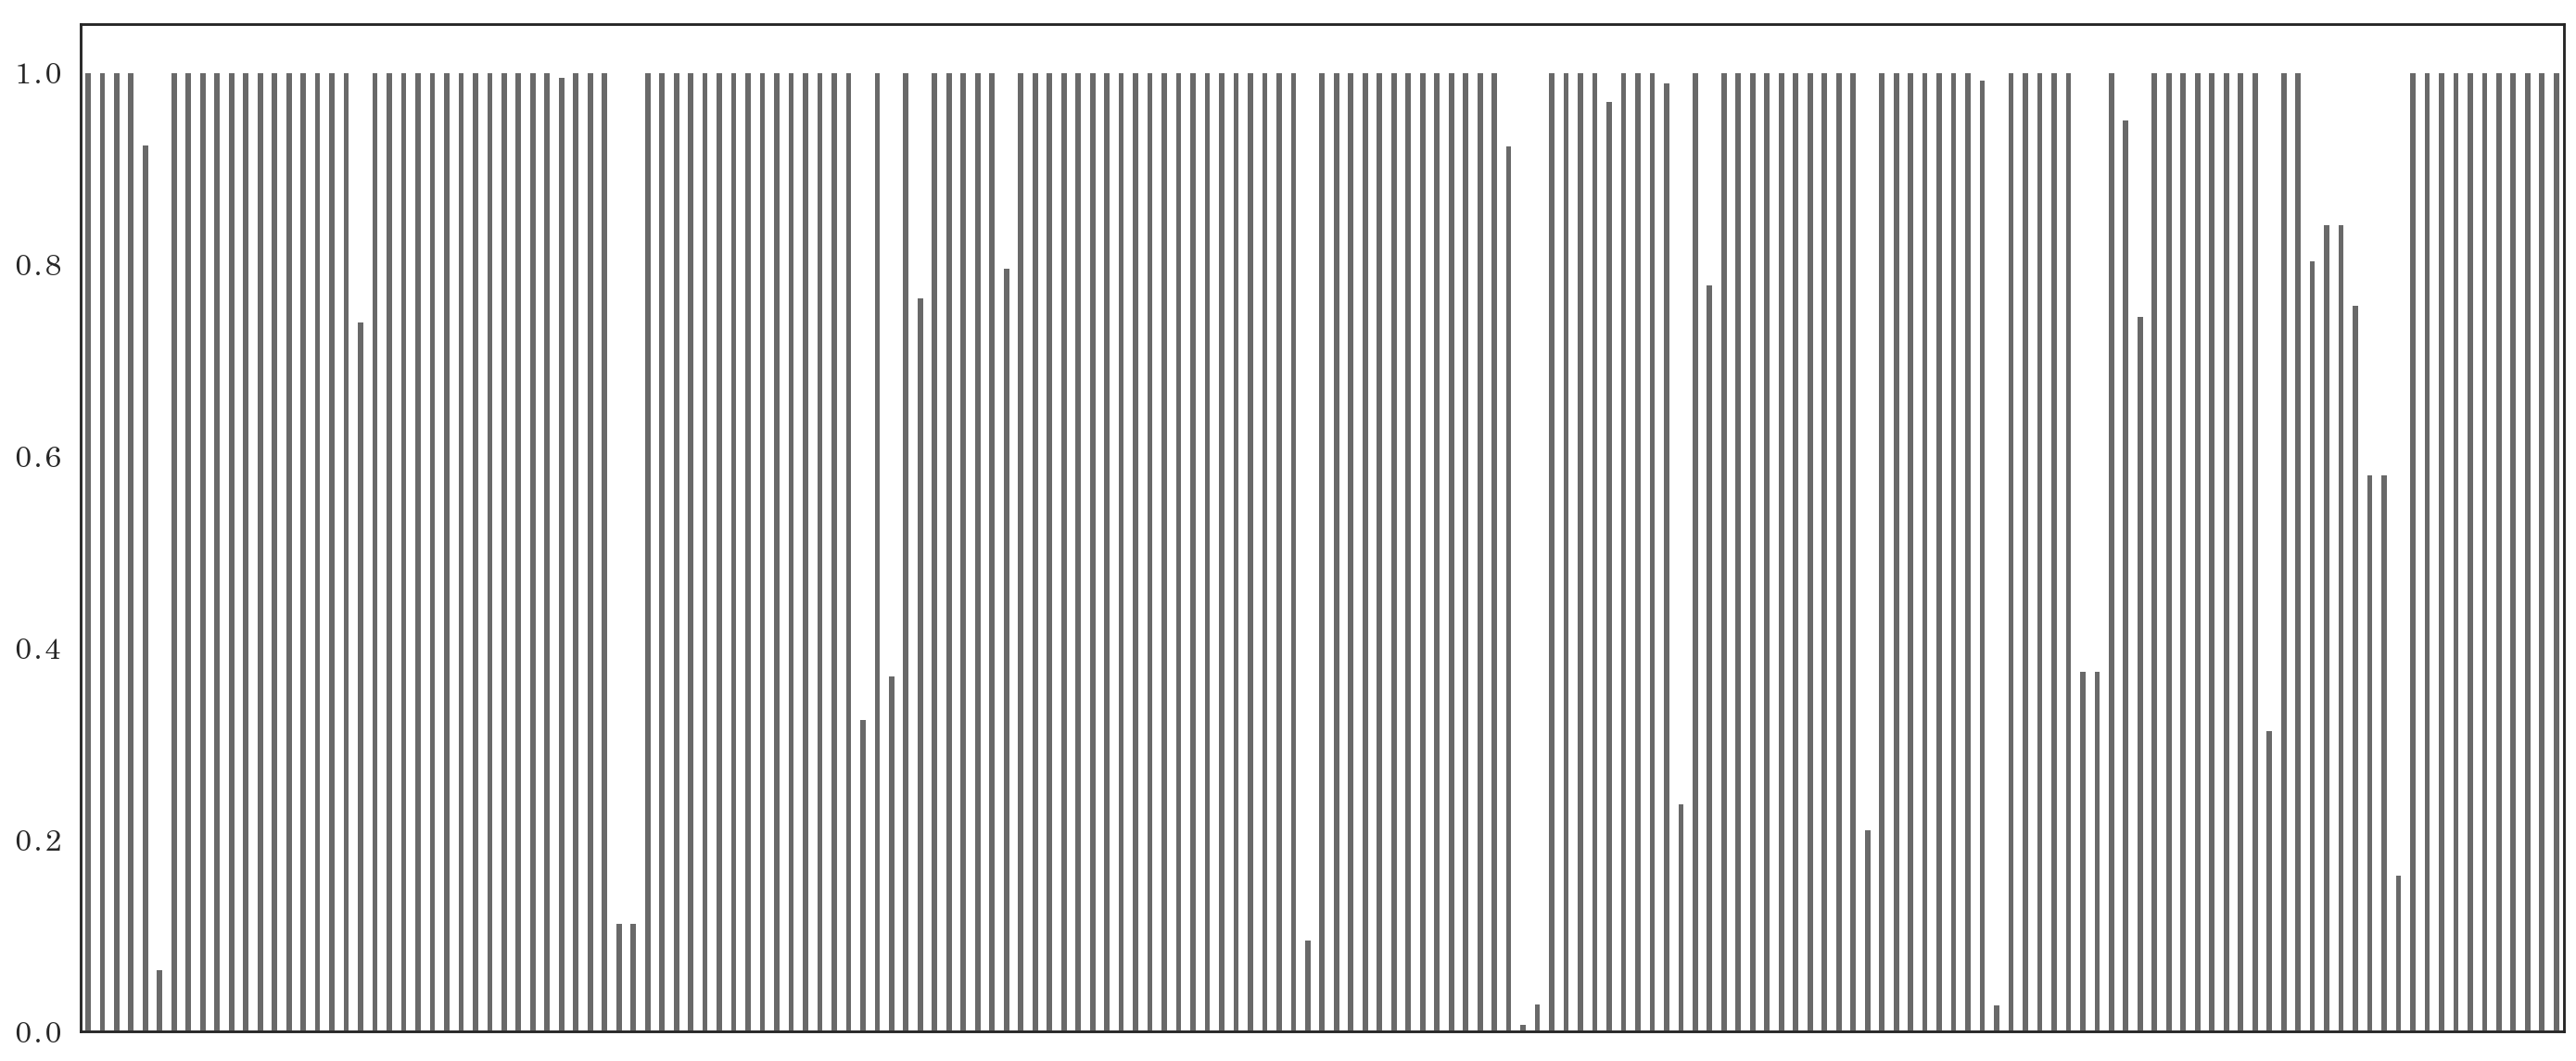

In [33]:
msn.bar(df_realvalue)